In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
df=pd.read_csv(r'/content/sample_data/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
age=df['Age'].mean()
cabin=df["Cabin"].mode()[0]
embarked=df["Embarked"].mode()[0]
df["Age"].fillna(age,inplace=True)
df["Cabin"].fillna(cabin,inplace=True)
df["Embarked"].fillna(embarked,inplace=True)

<ipython-input-36-cf0334540b62>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

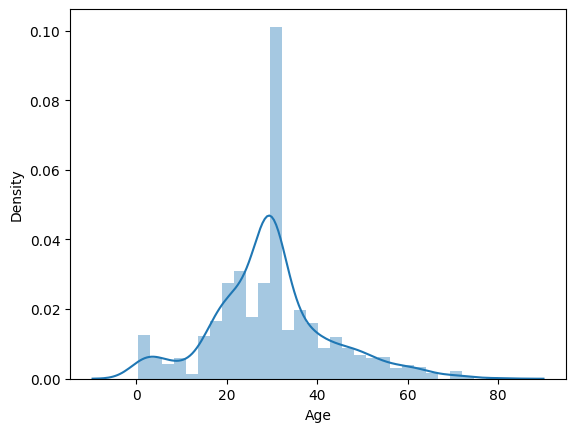

In [36]:
sns.distplot(df["Age"])

In [37]:
df.corr()

<ipython-input-37-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [38]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<Axes: >

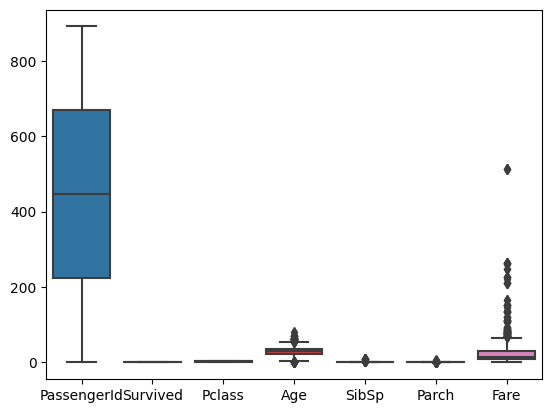

In [39]:
sns.boxplot(df)

In [40]:
dcols=["Name","Ticket"]
df.drop(dcols,axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,B96 B98,S
1,2,1,1,female,38.000000,1,0,71.2833,C85,C
2,3,1,3,female,26.000000,0,0,7.9250,B96 B98,S
3,4,1,1,female,35.000000,1,0,53.1000,C123,S
4,5,0,3,male,35.000000,0,0,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,B96 B98,S
887,888,1,1,female,19.000000,0,0,30.0000,B42,S
888,889,0,3,female,29.699118,1,2,23.4500,B96 B98,S
889,890,1,1,male,26.000000,0,0,30.0000,C148,C


In [41]:
cols=["Sex","Cabin","Embarked"]
encoded=pd.get_dummies(df[cols])
df.drop(cols,axis=1,inplace=True)
df=pd.concat([df,encoded],axis=1)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.000000,1,0,71.2833,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0,1,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,19.000000,0,0,30.0000,1,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,29.699118,1,2,23.4500,1,0,0,...,0,0,0,0,0,0,0,0,0,1
889,890,1,1,26.000000,0,0,30.0000,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
Y=df["Fare"]
df.drop("Fare",axis=1,inplace=True)
df
X=df

In [43]:
print(X)

     PassengerId  Survived  Pclass        Age  SibSp  Parch  Sex_female  \
0              1         0       3  22.000000      1      0           0   
1              2         1       1  38.000000      1      0           1   
2              3         1       3  26.000000      0      0           1   
3              4         1       1  35.000000      1      0           1   
4              5         0       3  35.000000      0      0           0   
..           ...       ...     ...        ...    ...    ...         ...   
886          887         0       2  27.000000      0      0           0   
887          888         1       1  19.000000      0      0           1   
888          889         0       3  29.699118      1      2           1   
889          890         1       1  26.000000      0      0           0   
890          891         0       3  32.000000      0      0           0   

     Sex_male  Cabin_A10  Cabin_A14  ...  Cabin_F G73  Cabin_F2  Cabin_F33  \
0           1        

In [44]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_scaled=pd.DataFrame(ms.fit_transform(X),columns=X.columns)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=20)

In [46]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train,y_train)

SVR()

In [47]:
y2_pred=svr_model.predict(X_test)
y2_pred

array([15.12167502, 13.93941189, 14.34384434,  8.62532963, 22.14649508,
       31.73201415, 13.05986095,  7.69621807, 31.53020564,  8.66461297,
       38.96601454, 10.79864968, 40.94375258,  8.65407129, 22.26109622,
       10.27057148, 14.10189045, 33.27738891, 24.4305517 , 21.90178585,
       25.625168  , 13.9108999 , 25.36867381,  7.79306383, 34.61230192,
       38.32627257,  8.53028176, 18.69021147, 18.10420816, 13.89007815,
        9.5144356 ,  7.82599763,  9.27314749, 29.99696991, 35.75781911,
        8.65526302, 13.79981529, 33.66786101,  9.29272809,  9.05516909,
       10.73940638,  8.2688918 ,  9.10896276, 26.57890699,  8.44431687,
        8.36140455,  7.63891676, 13.90942212, 41.83749813, 27.40416982,
       16.31913759, 24.15848608, 24.73270733, 39.82162299, 12.76867868,
       32.64693643,  7.93154739,  7.65673056, 35.13182128,  7.77132864,
       24.18194517, 14.32402476,  9.87594155,  7.68300441, 10.05887273,
       40.50240349, 14.55588201, 40.29144469, 21.29713744, 30.97

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
mse = mean_squared_error(y_test, y2_pred)
rmse = mean_squared_error(y_test, y2_pred, squared=False)
mae = mean_absolute_error(y_test, y2_pred)
r2 = r2_score(y_test, y2_pred)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2: ", r2)

MSE:  3045.4495459586087
RMSE:  55.1855918330012
MAE:  20.44126557200486
R2:  0.11428915191932143
